In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sklearn 
import numpy as np 
import os 
np.random.seed(420)

In [0]:
import pandas as pd # Pandas module to enable data manipulation

def load_crashes_data(housing_path="/content/drive/My Drive/ML"):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "Virginia_Crashes.csv")
    return pd.read_csv(csv_path)

In [0]:
crashes = load_crashes_data()
# Display the first n rows of the data. (n=5 by default)
crashes.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,X,Y,OBJECTID,Document_Nbr,Crash_Year,Route_Or_Street_Nm,Local_Case_Cd,Collision_Type,Roadway_Surface_Cond,First_Harmful_Event_of_Entire,Weather_Condition,Light_Condition,School_Zone,Crash_Severity,Fatal_Crashes,K_People,Pedestrians_Killed,Pedestrians_Injured,A_People,B_People,C_People,A_Crash,B_Crash,C_Crash,Pdo_Crash,Ped_Nonped,Bike_Nonbike,Motor_Nonmotor,Speed_Notspeed,Belted_Unbelted,Alcohol_Notalcohol,Rd_Type,Crash_Event_Type_Dsc,Crash_Military_Tm,Time_Slicing,Vehiclenumber,Vehicle_Body_Type_Cd,Driverinjurytype,Driverage,Drivergen,Driver_Action_Type_Cd,Passinjurytype,Passage,Passgen,Pedinjurytype,Pedage,Pedgen,Young_Notyoung,Senior_Notsenior,Rte_Nm,Rns_Mp,Ownership,SYSTEM,FUN,FAC,Carspeedlimit,Node_Info,Deer_Nodeer,Distracted_Notdistracted,LATITUDE,LONGITUDE,Physical_Juris,VDOT_District,DIAGRAM,VSP,MPO_NAME,PLAN_DISTRICT,Crash_Dt
0,-77.309935,37.543922,1001,130085090,2013,N AIRPORT DR.,130107163,2. Angle,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,3. No,A.Severe Injury,0,0,0,0,1,1,0,1,0,0,0,NOTPED,NaN,NaN,NaN,NaN,NaN,NOT-RD,20. Motor Vehicle In Transport,1444,12PM TO 3PM,"1,2","13. Bus - School Bus,22. Truck - Sport Utility...","B,A","57,19","Female,Male","1. No Improper Action,21. Disregarded Traffic ...",NaN,NaN,NaN,NaN,NaN,NaN,YOUNG,NaN,R-VA SR00156SB,48.901420,VDOT_PRI,PRIMARY,H.Urban Minor Arterial,"2.Divided, partial control of access",55,378196. SR00033 SR00033 SR00156 ...,NaN,DISTRACTED,37.543915,-77.309933,43.Henrico,4.Richmond District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,1,Richmond Transportation Planning Organization,15.Richmond Regional,2013-01-08T00:00:00.000Z
1,-77.625728,37.405874,1002,130085092,2013,12601 BAILEY BRIDGE ROAD,20130107039,1. Rear End,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,2. Yes - With School Activity,PDO.Property Damage Only,0,0,0,0,0,0,0,0,0,0,1,NOTPED,NaN,NaN,NaN,NaN,NaN,NOT-RD,20. Motor Vehicle In Transport,705,6AM TO 9AM,"1,2","1. Passenger car,2. Truck - Pick-up/Passenger ...","PDO,PDO","16,16","Female,Female","12. Following Too Close,1. No Improper Action",NaN,NaN,NaN,NaN,NaN,NaN,YOUNG,NaN,R-VA020SC00654NB,10.658994,VDOT_SEC,SECONDARY,I.Urban Collector,"0.Two-way, non-divided",35,203524. 2000654 2000654 2000817 ...,NaN,NaN,37.405867,-77.625726,20.Chesterfield,4.Richmond District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,1,Richmond Transportation Planning Organization,"15,19.Crater, Richmond",2013-01-08T00:00:00.000Z
2,-77.397551,37.548275,1003,130085093,2013,INTERSTATE 64,DIV113002325,3. Head On,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,3. No,PDO.Property Damage Only,0,0,0,0,0,0,0,0,0,0,1,NOTPED,NaN,NaN,NaN,NaN,NaN,RD-RIGHT,5. Guard Rail,1338,12PM TO 3PM,1,1. Passenger car,PDO,20,Female,43. Over Correction,NaN,NaN,NaN,NaN,NaN,NaN,YOUNG,NaN,R-VA IS00064EB,193.476178,VDOT_IS,INTERSTATE,A.Urban Interstate,"3.Divided, full control of access",55,.,NaN,NaN,37.548268,-77.397549,43.Henrico,4.Richmond District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,1,Richmond Transportation Planning Organization,15.Richmond Regional,2013-01-08T00:00:00.000Z
3,-77.447454,38.297423,1004,130085094,2013,RT 3,2013-79,1. Rear End,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,3. No,PDO.Property Damage Only,0,0,0,0,0,0,0,0,0,0,1,NOTPED,NaN,NaN,SPEED,NaN,ALCOHOL,NOT-RD,20. Motor Vehicle In Transport,1654,3PM TO 6PM,"1,2","1. Passenger car,1. Passenger car","PDO,PDO","56,41","Male,Female","12. Following Too Close,1. No Improper Action",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R-VA SR00003EBBUS001,2.486002,VDOT_PRI,PRIMARY,H.Urban Minor Arterial,"1.Divided, no control of access",45,621026. 8900606 C1SR00003 C1SR00003 ...,NaN,NaN,38.297415,-77.447451,89.Stafford,6.Fredericksburg District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,2,Fredericksburg Area Metropolitan Planning Orga...,16.George Washington Regional,2013-01-04T00:00:00.000Z
4,-77.484682,38.767450,1005,130085098,2013,

In [0]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893663 entries, 0 to 893662
Data columns (total 68 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   X                              893663 non-null  float64
 1   Y                              893663 non-null  float64
 2   OBJECTID                       893663 non-null  int64  
 3   Document_Nbr                   893663 non-null  int64  
 4   Crash_Year                     893663 non-null  int64  
 5   Route_Or_Street_Nm             893663 non-null  object 
 6   Local_Case_Cd                  891493 non-null  object 
 7   Collision_Type                 893663 non-null  object 
 8   Roadway_Surface_Cond           893663 non-null  object 
 9   First_Harmful_Event_of_Entire  893663 non-null  object 
 10  Weather_Condition              893663 non-null  object 
 11  Light_Condition                893663 non-null  object 
 12  School_Zone                   

In [0]:
crashes.describe()

,X,Y,OBJECTID,Document_Nbr,Crash_Year,Fatal_Crashes,K_People,Pedestrians_Killed,Pedestrians_Injured,A_People,B_People,C_People,A_Crash,B_Crash,C_Crash,Pdo_Crash,Crash_Military_Tm,Rns_Mp,Carspeedlimit,LATITUDE,LONGITUDE,VSP
count,893663.000000,893663.000000,893663.000000,8.936630e+05,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000,893663.000000
mean,-77.810555,37.773311,446832.000000,1.630962e+08,2016.094306,0.005787,0.006172,0.000829,0.013022,0.061626,0.274363,0.182150,0.050250,0.195528,0.092361,0.656073,1345.689960,51.937014,26.157030,37.773304,-77.810553,4.198049
std,1.417810,0.809780,257978.431144,2.008762e+07,2.023709,0.075855,0.083935,0.029131,0.120003,0.297753,0.639559,0.530737,0.218462,0.396607,0.289536,0.475017,549.888252,87.315697,25.909446,0.809780,1.417810,2.239895
min,-83.655420,0.000002,1.000000,1.300150e+08,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.089310,0.000000,0.000000,-83.655415,1.000000
25%,-78.303439,37.059909,223416.500000,1.432251e+08,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,930.000000,0.957762,0.000000,37.059901,-78.303436,2.000000
50%,-77.449244,37.551765,446832.000000,1.624453e+08,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1429.000000,6.627375,35.000000,37.551757,-77.449242,5.000000
75%,-77.102870,38.660294,670247.500000,1.814352e+08,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1742.000000,64.498035,55.000000,38.660287,-77.102868,6.000000
max,0.000020,39.437500,893663.000000,2.007751e+08,2020.000000,1.000000,6.000000,3.000000,8.000000,54.000000,58.000000,33.000000,1.000000,1.000000,1.000000,1.000000,2359.000000,510.240000,70.000000,39.437493,0.000000,7.000000


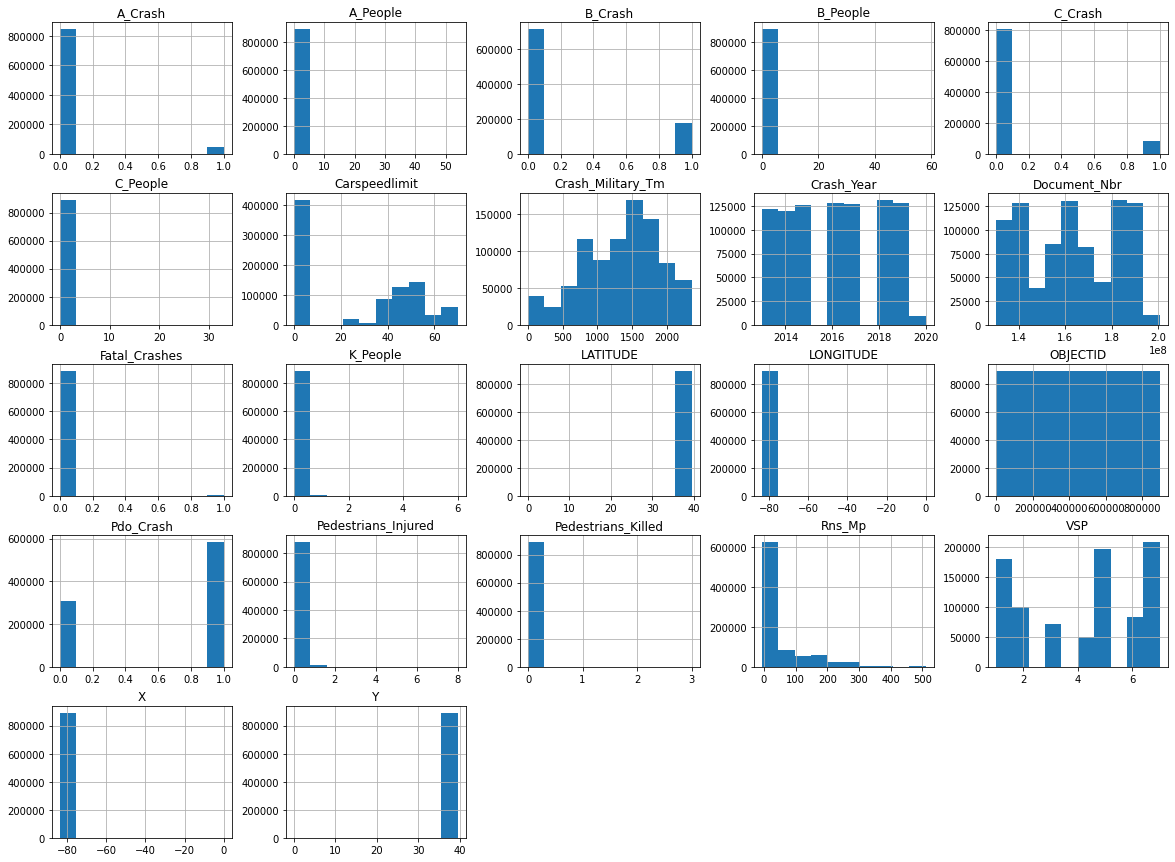

In [0]:
import matplotlib.pyplot as plt
crashes.hist(bins=10, figsize=(20,15))
plt.show()

In [0]:
corr_matrix = crashes.corr()
corr_matrix.shape

(22, 22)

In [0]:
corr_matrix


,X,Y,OBJECTID,Document_Nbr,Crash_Year,Fatal_Crashes,K_People,Pedestrians_Killed,Pedestrians_Injured,A_People,B_People,C_People,A_Crash,B_Crash,C_Crash,Pdo_Crash,Crash_Military_Tm,Rns_Mp,Carspeedlimit,LATITUDE,LONGITUDE,VSP
X,1.000000,0.111420,0.006277,0.007404,0.003948,-0.018348,-0.017743,0.002711,0.024689,-0.031089,-0.005002,0.079071,-0.030023,-0.000538,0.071858,-0.026613,-0.000253,0.088577,-0.114129,0.111420,1.000000,0.059941
Y,0.111420,1.000000,0.000322,0.000250,-0.001950,-0.017431,-0.016910,-0.001944,0.010457,-0.037783,-0.021056,-0.012061,-0.039720,-0.015710,-0.010486,0.040559,-0.001699,-0.046959,0.144943,1.000000,0.111420,0.234208
OBJECTID,0.006277,0.000322,1.000000,0.995891,0.989395,0.002627,0.002370,0.004801,-0.004358,-0.015484,0.008771,-0.017717,-0.016037,0.011685,-0.037081,0.019802,0.002474,0.008261,0.010437,0.000322,0.006277,-0.015313
Document_Nbr,0.007404,0.000250,0.995891,1.000000,0.996476,0.002552,0.002297,0.004708,-0.004472,-0.015329,0.008660,-0.017481,-0.015790,0.011646,-0.036511,0.019385,0.001523,0.007217,0.008181,0.000250,0.007404,-0.014917
Crash_Year,0.003948,-0.001950,0.989395,0.996476,1.000000,0.002553,0.002331,0.004216,-0.005541,-0.015350,0.010848,-0.021519,-0.015961,0.014066,-0.041946,0.020755,0.000270,0.007730,0.011250,-0.001950,0.003948,-0.019265
Fatal_Crashes,-0.018348,-0.017431,0.002627,0.002552,0.002553,1.000000,0.963838,0.373064,-0.002133,0.070266,0.003391,-0.012621,-0.017550,-0.037614,-0.024338,-0.105377,-0.004410,0.005232,0.019974,-0.017431,-0.018348,-0.013991
K_People,-0.017743,-0.016910,0.002370,0.002297,0.002331,0.963838,1.000000,0.345713,-0.002314,0.075671,0.004911,-0.012176,-0.016915,-0.036254,-0.023458,-0.101566,-0.004351,0.005918,0.020892,-0.016910,-0.017743,-0.013829
Pedestrians_Killed,0.002711,-0.001944,0.004801,0.004708,0.004216,0.373064,0.345713,1.000000,0.011316,-0.000860,-0.007105,-0.003255,-0.006547,-0.014033,-0.009080,-0.039312,0.004786,0.002005,-0.001538,-0.001944,0.002711,-0.000167
Pedestrians_Injured,0.024689,0.010457,-0.004358,-0.004472,-0.005541,-0.002133,-0.002314,0.011316,1.000000,0.093570,0.068995,0.023056,0.115554,0.101418,0.020328,-0.149871,0.023222,-0.024059,-0.061378,0.010457,0.024689,0.020263
A_People,-0.031089,-0.037783,-0.015484,-0.015329,-0.015350,0.070266,0.075671,-0.000860,0.093570,1.000000,0.018698,-0.000854,0.869915,-0.102037,-0.066023,-0.285859,0.003319,0.002655,0.021469,-0.037783,-0.031089,-0.012867


In [0]:
crashes.shape

(893663, 68)

In [0]:
	
# Delete row at index position 0 & 1
crashes = crashes.drop([crashes.index[65215], crashes.index[143760], crashes.index[313281], crashes.index[751810], crashes.index[761759]])

In [0]:
crashes.shape

(893658, 68)

In [0]:
temp = crashes
temp.drop(["Bike_Nonbike","Motor_Nonmotor","Speed_Notspeed","Belted_Unbelted","Alcohol_Notalcohol","Driverage","Passinjurytype","Passage","Passgen","Pedinjurytype","Pedage","Pedgen","Young_Notyoung","Senior_Notsenior","FUN","FAC","Deer_Nodeer","Distracted_Notdistracted","MPO_NAME","X","Y","OBJECTID","Document_Nbr"], axis=1).shape

(893658, 45)

In [0]:
crash_nums = temp.select_dtypes(['number'])

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

crash_num_tr = num_pipeline.fit_transform(crash_nums)

In [0]:
crash_num_tr[0]

array([ 0.35641607, -0.28527523, -1.72817508, -1.64336208, -1.5290319 ,
       -0.07629639, -0.07353733, -0.02846345, -0.10851133,  3.15151375,
        1.13458564, -0.34320212,  4.34743531, -0.49300385, -0.31899753,
       -1.38115364,  0.17877636, -0.03476901,  1.11321721, -0.28527525,
        0.35641606, -1.42776993])

In [0]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(crash_num_tr)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

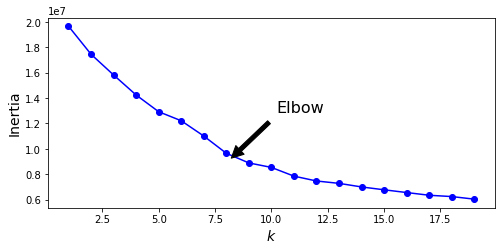

In [0]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(8, inertias[8]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [0]:
inertias

[19660476.0,
 17452086.19382045,
 15819671.610942304,
 14243799.695601638,
 12926604.683096746,
 12216279.678582387,
 11013096.787561271,
 9654372.355556607,
 8895040.896252232,
 8541100.612331193,
 7855792.013965768,
 7472798.325613361,
 7285626.356597997,
 7003787.783027503,
 6779586.9814796215,
 6563466.130725625,
 6349396.848819359,
 6246155.355892321,
 6043162.996853248]

In [0]:
kmeans = KMeans(n_clusters=8, random_state=42)
y_pred = kmeans.fit_predict(crash_num_tr)

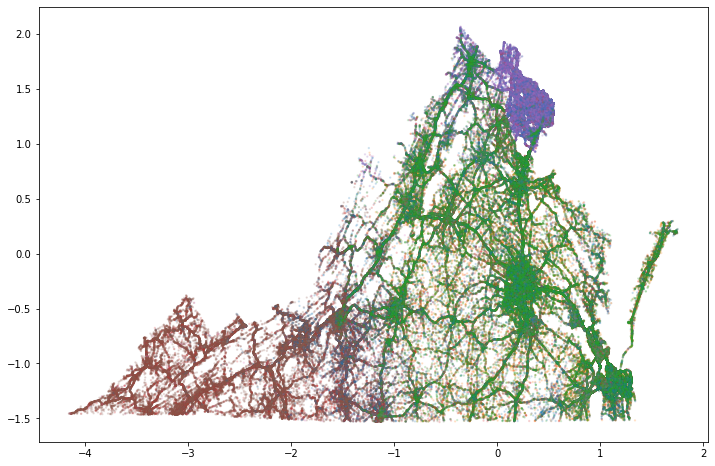

In [0]:
LABEL_COLOR_MAP = {0 :'#1f77b4', 1:'#ff7f0e', 2:'#2ca02c', 3:'#d62728', 4:'#9467bd', 5:'#8c564b', 6:'#e377c2', 7:'#7f7f7f', 8:'#bcbd22', 9:'#17becf'}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.figure(figsize=(12, 8))
plt.scatter(x=crash_num_tr[:, 20], y=crash_num_tr[:, 19],alpha = .15, s=2, c = label_color)
plt.show()
# for i in range(8):
  # plt.figure(figsize=(4, 4))
  # plt.scatter(x=crash_num_tr[:,20], y=crash_num_tr[:,19],alpha = .35, s=10)
  # plt.show()
